##  Twitter Emoji Streams: A Time Series Visualization
Stefan Bund, bund@umich.edu

### Abstract
Twitter is a constant stream of ASCII media, otherwise known as emojis. These emojis contain vital research content. The emphasis in this experimental notebook is to apply a grammar of graphics approach to exploring twitter streams, as it pertains to emoji content. A firehose, time series of tweets related to a televised boxing match was captured, then visualized. 

## Objectives
The study focused on these objectives. 

**Retain the Time Series Encoding.** The original inks the details of the time series ticks, very precisely. This provides a pseudo-scientific 'factuality' to the graphic. Since the purpose of the study was to have fun, I wanted to abstract the precision of the time series line mark, retaining the preattentive, oppositional color encodings for each team. 

**Retain the cultural symbolism for the audience.** Since the spirit of the chart was to have fun, while illuminating the emoi types, I proposed displaying the most popular of each emoji, at periodic, important time events. Thus, the oppositional encoding of each line mark could be accompanied by the emojis which ranked at the top of each critical moment. This attempts to convey a sense of narrative, which clearly takes place within the 'battle of the emojis.' Again, I am trying to capture the fun spirit of the study.

**Abstract Time Series Encoding, for a more aesthetic outcome.** Instead of encoding the time series with highly precise marks, I am making a smoothed line. This captures the quantitative value of the time series, but illustrates the series as a shape or trend. 

**Use Emojis as image marks, in Altair.** Also, the circles represent emojis, for each team. The highest occuring emoji appears in each circle mark. This chart would take place while using an HConcat circle mark with an imposed, image mark at each x/y location. In python, the top occuring emoji, for each interval, would be listed.

**Maintain oppositional color hue. Enhance the feeling of contest.** The effort in the graphic, below, is to enhance the spirit that the two data series encodes a battle happening. Hence, the oppositional color hues is encoded, multipally, with oppositional emojis, along a time series axis.

A mockup of the approach, where circles represent emojis, at key moments.

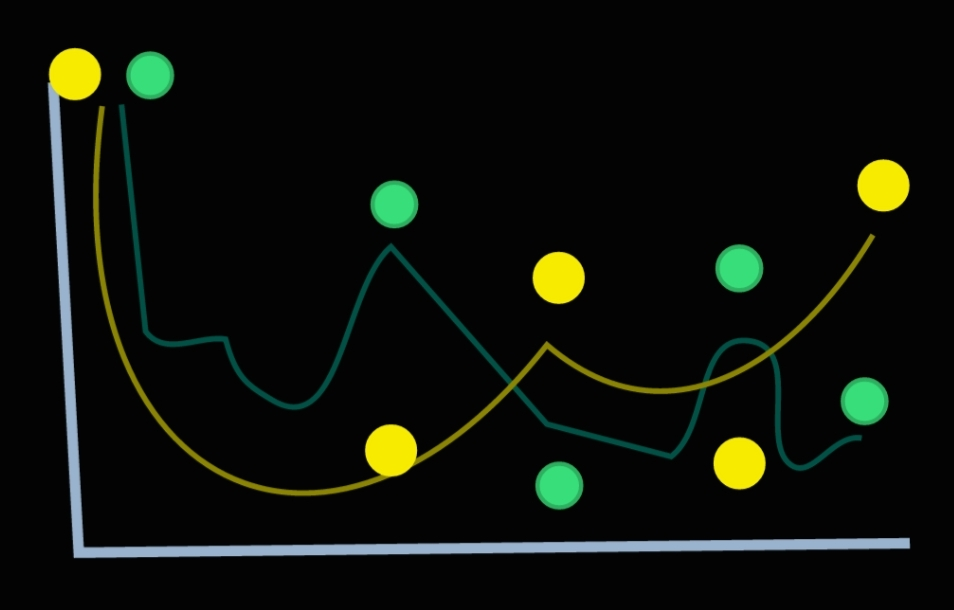



In [2]:
# start with the setup
import pandas as pd
import altair as alt
import numpy as np

In [3]:
# enable correct rendering
alt.renderers.enable('default')

RendererRegistry.enable('default')

In [4]:
# uses intermediate json files to speed things up
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

In [5]:
# we're going to do some setup here in anticipation of needing the data in 
# a specific format. We moved it all up here so everything is in one place.

def loadData(filename='assets/tweets.csv'):
    # load the tweets
    tweets = pd.read_csv(filename)

    # we're going to process the data in a couple of ways
    # first, we want to know how many emojis are in each tweet so we'll create a new column
    # that counts them
    tweets['emojis'] = tweets['text'].str.findall(r'[^\w\s.,"@\'?/#!$%\^&\*;:{}=\-_`~()\U0001F1E6-\U0001F1FF]').str.len()

    # next, there are a few specific emojis that we care about, we're going to create
    # a column for each one and indicate how many times it showed up in the tweet
    boxer_emojis = ['☘️','🇮🇪','🍀','💸','🤑','💰','💵','😴','😂','🤣','🥊','👊','👏','🇮🇪','💪','🔥','😭','💰']
    for emoji in boxer_emojis:
        # here's a different way to get the counts
        tweets[emoji] = tweets.text.str.count(emoji)

    # For the irish pride vs the money team we want the numer 
    # of either ☘️, 🇮🇪 or 🍀 and 💸, 🤑, 💰 or 💵 for each
    tweets['irish_pride'] = tweets['☘️'] + tweets['🇮🇪'] + tweets['🍀']
    tweets['money_team'] = tweets['💸'] + tweets['🤑'] + tweets['💰'] +  tweets['💵']
    tweets['largest'] = tweets[boxer_emojis].idxmax(axis=1)#.reset_index()#we need like 10 emojis

    # create a datetime column in the right format so it's easier to use later
    tweets['datetime'] = pd.to_datetime(tweets['created_at'])
    tweets = tweets.set_index('datetime')
    
    return(tweets)

tweets = loadData()

In [6]:
tweets.head()
# be = ['☘️','🇮🇪','🍀','💸','🤑','💰','💵','😴','😂','🤣','🥊','👊','👏','🇮🇪','💪','🔥','😭','💰']
# print(tweets[tweets['created_at'] =='2017-08-27 00:05:35'])
# print(tweets.where(tweets['created_at'] =='2017-08-27 00:05:35')[be].max())

,created_at,emojis,id,link,retweeted,screen_name,text,☘️,🇮🇪,🍀,...,🤣,🥊,👊,👏,💪,🔥,😭,irish_pride,money_team,largest
datetime,,,,,,,,,,,,,,,,,,,,,
2017-08-27 00:05:34,2017-08-27 00:05:34,1,901656910939770881,https://twitter.com/statuses/901656910939770881,False,aaLiysr,Ringe çıkmadan ateş etmeye başladı 😃#McGregor ...,0,0,0,...,0,0,0,0,0,0,0,0,0,☘️
2017-08-27 00:05:35,2017-08-27 00:05:35,5,901656917281574912,https://twitter.com/statuses/901656917281574912,False,zulmafrancozaf,😲😲😲😲😲 @lalylourbet2 https://t.co/ERUGHhQINE,0,0,0,...,0,0,0,0,0,0,0,0,0,☘️
2017-08-27 00:05:35,2017-08-27 00:05:35,2,901656917105369088,https://twitter.com/statuses/901656917105369088,False,Adriana11D,🇮🇪🇮🇪🇮🇪 💪💪#MayweathervMcgregor,0,3,0,...,0,0,0,0,2,0,0,3,0,🇮🇪
2017-08-27 00:05:35,2017-08-27 00:05:35,2,901656917747142657,https://twitter.com/statuses/901656917747142657,False,Nathan_Caro_,Cest partit #MayweatherMcGregor 💪🏿,0,0,0,...,0,0,0,0,1,0,0,0,0,💪
2017-08-27 00:05:35,2017-08-27 00:05:35,2,901656916828594177,https://twitter.com/statuses/901656916828594177,False,sahouraxox,Low key feeling bad for ppl who payed to watch...,0,0,0,...,2,0,0,0,0,0,0,0,0,🤣


### Preliminary data exploration

In [7]:
# We'll help you out with a table that has the percentages for each emoji

def createPercentagesDF(tweets):
    # input: the tweets dataframe as formatted above
    # dictionary that will map emoji to percentage
    percentages = {}  

    # find total emojies
    total = tweets['emojis'].sum() 

    # for each emoji, figure out how prevalent it is
    emojis = ['😂','🤣','🥊','👊','👏','🇮🇪','💪','🔥','😭','💰']
    for emoji in emojis:  
        percentages[emoji] = [round(tweets[emoji].sum() / total * 100,1)]

    # create a data frame to hold this from the dictionary
    percentages_df = pd.DataFrame.from_dict(percentages).T

    # sort the df 
    percentages_df = percentages_df.sort_values(by=[0], ascending = False).reset_index()

    # rename the columns
    percentages_df = percentages_df.rename(columns={'index':'EMOJI', 0: 'PERCENT'})

    # create a rank column based on position in the ordered list
    percentages_df['rank'] = pd.Index(list(range(1,11)))

    # modify the text
    percentages_df['PERCENT_TEXT'] = percentages_df['PERCENT'].astype('str') + ' %'
    return(percentages_df)

percentages_df = createPercentagesDF(tweets)

In [8]:
# uncomment to see what's inside
percentages_df

,EMOJI,PERCENT,rank,PERCENT_TEXT
0,😂,23.1,1,23.1 %
1,🥊,5.7,2,5.7 %
2,👊,3.5,3,3.5 %
3,👏,3.0,4,3.0 %
4,💪,2.5,5,2.5 %
5,🇮🇪,2.4,6,2.4 %
6,🤣,2.3,7,2.3 %
7,🔥,2.3,8,2.3 %
8,😭,2.0,9,2.0 %
9,💰,1.8,10,1.8 %


### exploration 2

In [9]:
# use percentages_df to recreate the visualization above
import numpy as np
def create_percentages_vis(indf):
    bars = alt.Chart(indf).mark_bar(size=20,color='goldenrod').encode( 
        y=alt.Y('EMOJI:O',sort=alt.EncodingSortField(field="rank:O",order ='descending', op='min'),
                axis=None), 
        x=alt.X('PERCENT:Q', axis=None),
        )
    
    emojis = bars.encode(
        y=alt.Y('EMOJI', axis=None, sort=alt.EncodingSortField(field="rank:N",order ='descending', op='min')),
        text=alt.Text('EMOJI')
    ).mark_text().properties(width=30) 
    
    pcts = bars.encode(
        y=alt.Y('EMOJI', axis=None,sort=alt.EncodingSortField(field="rank:N",order ='descending', op='min')),
        text=alt.Text('PERCENT_TEXT:O')
    ).mark_text().properties(width=30)
    print("\n\n")

    l= alt.hconcat( emojis, pcts,bars
    ).configure_axis(
        grid=False,
    ).configure_view(strokeWidth=0)
                   
    return l

In [10]:
# test our solution
create_percentages_vis(percentages_df)

alt.HConcatChart(...)

There were the likely frontrunners for most-used emoji: the 🥊, the 👊, the 💪. But the emoji of the fight was far and away the 😂. (“Face with tears of joy.”)<sup>2<sup>

In [11]:
# Again, we're going to help you set up the data

# We're going to want to work with time objects so we need to make a datetime
# column (basically transforming the text in "created at"). It duplicates
# the data but it will make things easier

def createTimeSeries(indf):
    # input: indf, a df like the tweets database
    # ouput: the time series object limited to certain teams
    teams = indf.copy()
    teams['irish_pride']
    teams = teams.resample('1s').sum()
    teams  = teams[(teams['💸']>0) | (teams['🤑']>0) | (teams['💰']>0) | (teams['💵']>0) | (teams['☘️']>0) | (teams['🍀']>0) | (teams['🇮🇪']>0) ]

    # next we're going to create a rolling average
    # first for the money team
    mdf = teams['money_team'].rolling('4Min').mean().reset_index()
    mdf['team'] = '💸🤑💰💵'
    mdf = mdf.rename(columns={'money_team':'tweet_count'})

    # next for the irish team
    idf = teams['irish_pride'].rolling('4Min').mean().reset_index()
    idf['team'] = '☘️🍀🇮🇪'
    idf = idf.rename(columns={'irish_pride':'tweet_count'})

    # now we'll combine our datasets
    ndf = pd.concat([mdf,idf])
    return(ndf)

In [12]:
ndf = createTimeSeries(tweets)

In [13]:
# uncomment to see what's inside
ndf.sample(5)

,datetime,tweet_count,team
806,2017-08-27 01:14:46,0.883721,☘️🍀🇮🇪
260,2017-08-27 00:21:00,0.933333,💸🤑💰💵
773,2017-08-27 01:11:38,3.166667,💸🤑💰💵
569,2017-08-27 00:56:36,0.478261,☘️🍀🇮🇪
500,2017-08-27 00:52:29,0.594595,☘️🍀🇮🇪


In [14]:
# we're also going to create an annotations data frame to help you

def createKeyPointsAnnotationsDF():
    # output: a data frame capturing the annotations at desired times (and placements in the vis)
    annotations = [['2017-08-27 00:15:00',4, 'Fight begins'],
                   ['2017-08-27 00:22:00',5, 'McGregor does OK \nin the early rounds'],
                   ['2017-08-27 00:53:00',4, 'Mayweather takes \nover and wins by \nTKO']]
    a_df = pd.DataFrame(annotations, columns=['date','count','note'])
    return(a_df)


In [15]:
a_df = createKeyPointsAnnotationsDF()

In [16]:
# uncomment to see what's inside
a_df

,date,count,note
0,2017-08-27 00:15:00,4,Fight begins
1,2017-08-27 00:22:00,5,McGregor does OK \nin the early rounds
2,2017-08-27 00:53:00,4,Mayweather takes \nover and wins by \nTKO


### Prior Art
I sought to offer a recreated version of the original visualizations on 538 blog. 

In [17]:
# your turn, create your solution

def create_pride_vis(timeseries,ann):
    # input: timeseries (a frame formatted like ndf above)
    # input: annotations (a frame formatted like a_df above)
    # return an Altair vis matching the example above
#     source = data.stocks()

    c= alt.Chart(timeseries).mark_line().encode(
                x=alt.X("datetime:T" ), 
                y=alt.Y("tweet_count:Q", title="Four-minute rolling average"), 
                color=alt.Color('team:O', scale=alt.Scale(scheme='goldgreen'),
                legend=alt.Legend(
                                orient='none',
                                legendX=130, legendY=-40, title=None,
                                direction='horizontal',
                                titleAnchor='middle'))
    )

    ann = alt.Chart(ann).mark_text(
        align='center',
        baseline='middle',
        fontSize = 10,
        dx = 9
    ).encode(
        x='date:T',
        y='count:Q',
        text='note'
    )
    
    return (c + ann).properties(title=
        {"text":["Irish Pride VS The Money Team"],
       "subtitle":["Four-minute rolling average of the number of uses of selected emoji in sampled tweets during the Mayweather-McGregor fight"]},
       width=600, height=350)
# , color=alt.Color('tweet_count:Q', scale=alt.Scale(scheme='oranges'))

In [18]:
create_pride_vis(ndf,a_df)

alt.LayerChart(...)

## recreation, data exploration 4

In [19]:
def ann23():
    # output: a data frame capturing the annotations at desired times (and placements in the vis)
    annotations = [['2017-08-27 00:15:00',80, 'Fight begins'],
                   ['2017-08-27 00:30:00',60, 'Mayweather\ntakes control in middle rounds']]
    a_df = pd.DataFrame(annotations, columns=['datetime','tweet_count','note'])
    return(a_df)

In [20]:
def clean232(indf):
    f = indf.copy()
    f.resample('1s').sum()
    f['face'] = f['😴']
    f['fire'] = f['🔥'] #prep for subdivide, tweet_counts
    
    #makde df 1: 
    f1 = f['face'].rolling('3Min').sum().reset_index() 
    f1['emoj'] = '😴'
    f1 = f1.rename(columns ={'face':'tweet_count'})
    
    f2 = f['fire'].rolling('3Min').sum().reset_index()
    f2['emoj'] = '🔥'
    f2 = f2.rename(columns={'fire':'tweet_count'})
    
    rdf = pd.concat([f1,f2])
#     print('cleansed:\n', rdf)
    return rdf

In [21]:
def c2(indf,l):
    e = clean232(indf) 
    scale = alt.Scale(domain=['😴','🔥'], range=['blue','red'])
    color=alt.Color('datetime:T', scale=scale)
    c = alt.Chart(e).transform_fold(
        ['datetime:T','tweet_count:Q'],
    ).mark_line().encode(
        x='datetime:T',
        y='tweet_count:Q',
        color=alt.Color('emoj:N', scale=scale)
    )
    ann = alt.Chart(l).mark_text(
        align='center',
        baseline='middle',
        fontSize = 10,
        dx = 9
     ).encode(
        x='datetime:T',
        y='tweet_count:Q',
        text='note'
    )
    
    return (c +ann).properties(title={"text":["Much Hype, Some Boredom"],
       "subtitle":["Four-minute rolling average of the number of uses of selected emoji\nin sampled tweets during the Mayweather-McGregor fight"]}
        ,width=600, height=350)


In [22]:
# test our solution
# create_hype_vis(tweets)
l = ann23()
l
c2(tweets,l)

alt.LayerChart(...)

### Final Work: embedding mean-leader emojis
The top most tweeted emojis were selected for critical, traffic leading moments of the fight. The top emojis tweeted at the top moments of the fight were presented in the line chart.

In [23]:
def cts(indf):
    # input: indf, a df like the tweets database
    # ouput: the time series object limited to certain teams
    teams = indf.copy()
    teams['irish_pride']
    teams = teams.resample('30s').sum()
    teams  = teams[(teams['💸']>0) | (teams['🤑']>0) | (teams['💰']>0) | (teams['💵']>0) | (teams['☘️']>0) | (teams['🍀']>0) | (teams['🇮🇪']>0) ]
    mdf = teams['money_team'].rolling('5Min').mean().reset_index()
    mdf['team'] = '💸🤑💰💵'
    mdf = mdf.rename(columns={'money_team':'tweet_count'})
    idf = teams['irish_pride'].rolling('5Min').mean().reset_index()
    idf['team'] = '☘️🍀🇮🇪'
    idf = idf.rename(columns={'irish_pride':'tweet_count'})
    ndf = pd.concat([mdf,idf])
    return(ndf)

In [24]:
def create_e_vis(ts):
    dfb = ts.copy()
    be = ['☘️','🇮🇪','🍀','💸','🤑','💰','💵','😴','😂','🤣','🥊','👊','👏','🇮🇪','💪','🔥','😭','💰']
    dfb['largest'] = dfb[be].idxmax(axis=1)                #we need like 10 emojis    
    l = cts(ts)                                            #get tweet count data set
    x= pd.merge(l, dfb, on="datetime", how='left')         #merged tweet count with most prevalent emoji
    ems = x.sort_values(by=['datetime'], ascending=True)
    ems = ems.drop_duplicates(subset=['datetime']).dropna()
    ems.groupby(pd.Grouper(key='datetime', freq='10min'))
    ems.iloc[:30]
    
    c= alt.Chart(l).mark_line(color="#ccffff").encode(                     #vis tweet volume flow
                x=alt.X("datetime:T" ), 
                y=alt.Y("tweet_count:Q")
    ) 

    band=alt.Chart(l).mark_errorband(extent='ci',color='grey').encode(                 #vis volume
        x=alt.X("datetime:T" ,axis=alt.Axis(title="time", grid=False)), 
                y=alt.Y("max(tweet_count)",axis=alt.Axis(title="tweet volume/ most used emoji", grid=False))
    )

    ann = alt.Chart(ems).mark_text(                               #vis most prevalent emoji, as ordinal
        align='center',
        baseline='middle',
        fontSize = 17,
        dx = 9
    ).encode(
        x='datetime:T',
        y='max(tweet_count)',
        text='largest:O'#team:O
    )

    return (band+ c+ann).properties(title={"text":["Bouts of Tweets: the Chronology of Emoticons Among Boxing Audiences"],
       "subtitle":["The most tweeted emojis during the highest intensity volume of tweets, McGregor versus Mayweather, 2016"]},
        height=300,width=800,background="#F2FAEE")

In [25]:
create_e_vis(tweets)

alt.LayerChart(...)